In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits import mplot3d
import numpy as np
import json
import ast
import sklearn

df = pd.read_csv("../2_clean_data/final_combine_data.csv")

In [83]:
#Columns with lists are represented as strings, so this is converting them into list/np.array types

for index, row in df.iterrows():
    df.iloc[index]['salaries'] = ast.literal_eval(df.iloc[index]['salaries'])
    df.iloc[index]['semester'] = ast.literal_eval(df.iloc[index]['semester'])
    df.iloc[index]['years_taught'] = ast.literal_eval(df.iloc[index]['years_taught'])
    df.iloc[index]['course'] = ast.literal_eval(df.iloc[index]['course'])
    df.iloc[index]['average_rating'] = np.fromstring(df.iloc[index]['average_rating'].strip("[]"), sep=',')
    df.iloc[index]['num_reviews'] = np.fromstring(df.iloc[index]['num_reviews'].strip("[]"), sep=',')
    df.iloc[index]['average_gpa'] = np.fromstring(df.iloc[index]['average_gpa'].strip("[]"), sep=',')
    df.iloc[index]['num_students'] = ast.literal_eval(df.iloc[index]['num_students'])

In [84]:
import re
df = df.drop([1615, 1616])
# Getting the minimum year
df['min_year'] = df['years_taught'].apply(lambda x: min([sem for sem in x]))
# Getting lifespan of professor from first year taught to current semester that is being taught
df['year'] = df['semester'].apply(lambda x: min([sem.split(" ")[1] for sem in x]))
df['min_year'] = df[['min_year', 'year']].min(axis=1)
df = df.drop(['year'], axis=1)
df = df.explode(['course', 'semester', 'average_rating', 'num_reviews', 'average_gpa', 'num_students'])
df['curr_year'] = df['semester'].apply(lambda x: int(x.split(" ")[1]))
df['lifetime'] = df['curr_year'] - df['min_year']
df.loc[df['lifetime'] < 0, 'lifetime'] = np.nan


/tmp/ipykernel_9556/2488250113.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['min_year'] = df[['min_year', 'year']].min(axis=1)


In [85]:
df

,name,course,semester,average_rating,num_reviews,average_gpa,num_students,years_taught,salaries,departments,real_name(s),_merge,min_year,curr_year,lifetime
0,A SHARMA,ASTR300,fall 2019,1.0,1.0,NaN,0,"[2013, 2014, 2015, 2016, 2017, 2018, 2019, 202...","[68417.04, 146412.46, 76537.12, 76537.12, 7768...","['CMNS', 'CMNS', 'CMNS', 'CMNS', 'CMNS', 'CMNS...","Sharma, A Surjalal",both,2013,2019,6.0
0,A SHARMA,ASTR300,spring 2019,1.5,2.0,2.85,57,"[2013, 2014, 2015, 2016, 2017, 2018, 2019, 202...","[68417.04, 146412.46, 76537.12, 76537.12, 7768...","['CMNS', 'CMNS', 'CMNS', 'CMNS', 'CMNS', 'CMNS...","Sharma, A Surjalal",both,2013,2019,6.0
0,A SHARMA,ASTR300,fall 2020,2.0,1.0,NaN,0,"[2013, 2014, 2015, 2016, 2017, 2018, 2019, 202...","[68417.04, 146412.46, 76537.12, 76537.12, 7768...","['CMNS', 'CMNS', 'CMNS', 'CMNS', 'CMNS', 'CMNS...","Sharma, A Surjalal",both,2013,2020,7.0
0,A SHARMA,ASTR300,winter 2021,3.0,1.0,NaN,0,"[2013, 2014, 2015, 2016, 2017, 2018, 2019, 202...","[68417.04, 146412.46, 76537.12, 76537.12, 7768...","['CMNS', 'CMNS', 'CMNS', 'CMNS', 'CMNS', 'CMNS...","Sharma, A Surjalal",both,2013,2021,8.0
0,A SHARMA,ASTR300,fall 2016,NaN,NaN,2.92,51,"[2013, 2014, 2015, 2016, 2017, 2018, 2019, 202...","[68417.04, 146412.46, 76537.12, 76537.12, 7768...","['CMNS', 'CMNS', 'CMNS', 'CMNS', 'CMNS', 'CMNS...","Sharma, A Surjalal",both,2013,2016,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2437,TIM KIEMEL,KNES497,spring 2018,NaN,NaN,3.71,20,"[2015, 2016, 2017, 2018, 2019, 2020, 2021, 202...","[35621.46, 35621.46, 35621.46, 35621.46, 72667...","['SPHL', 'SPHL', 'SPHL', 'SPHL', 'SPHL', 'SPHL...","Kiemel, Tim",both,2013,2018,5.0
2437,TIM KIEMEL,KNES689D,spring 2013,NaN,NaN,4.0,7,"[2015, 2016, 2017, 2018, 2019, 2020, 2021, 202...","[35621.46, 35621.46, 35621.46, 35621.46, 72667...","['SPHL', 'SPHL', 'SPHL', 'SPHL', 'SPHL', 'SPHL...","Kiemel, Tim",both,2013,2013,0.0
2437,TIM KIEMEL,KNES689D,spring 2017,NaN,NaN,4.0,9,"[2015, 2016, 2017, 2018, 2019, 2020, 2021, 202...","[35621.46, 35621.46, 35621.46, 35621.46, 72667...","['SPHL', 'SPHL', 'SPHL', 'SPHL', 'SPHL', 'SPHL...","Kiemel, Tim",both,2013,2017,4.0
2437,TIM KIEMEL,KNES689M,spring 2015,NaN,NaN,4.0,5,"[2015, 2016, 2017, 2018, 2019, 2020, 2021, 202...","[35621.46, 35621.46, 35621.46, 35621.46, 72667...","['SPHL', 'SPHL', 'SPHL', 'SPHL', 'SPHL', 'SPHL...","Kiemel, Tim",both,2013,2015,2.0


In [86]:
df[['sem', 'year']] = df['semester'].str.split(' ', 1, expand=True)

/tmp/ipykernel_9556/2949145723.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['sem', 'year']] = df['semester'].str.split(' ', 1, expand=True)


In [87]:
# Getting current salary
# get the current year, get the index in years taught, get the value of salaries at that index
def getIndex(year, array):
    differenceArray = np.absolute(np.array(array)-year)
    return differenceArray.argmin()
def getSalary(index, salary):
    return salary[index]
df['index'] = df.apply(lambda x: getIndex(x['curr_year'], x['years_taught']), axis=1)
df['current_salary'] = df.apply(lambda x: getSalary(x['index'], x['salaries']), axis=1)
df = df.drop('index', axis=1)

In [8]:
df

,name,course,semester,average_rating,num_reviews,average_gpa,num_students,years_taught,salaries,departments,real_name(s),_merge,min_year,curr_year,lifetime,sem,year,current_salary
0,A SHARMA,ASTR300,fall 2019,1.0,1.0,NaN,0,"[2013, 2014, 2015, 2016, 2017, 2018, 2019, 202...","[68417.04, 146412.46, 76537.12, 76537.12, 7768...","['CMNS', 'CMNS', 'CMNS', 'CMNS', 'CMNS', 'CMNS...","Sharma, A Surjalal",both,2013,2019,6.0,fall,2019,86528.86
0,A SHARMA,ASTR300,spring 2019,1.5,2.0,2.85,57,"[2013, 2014, 2015, 2016, 2017, 2018, 2019, 202...","[68417.04, 146412.46, 76537.12, 76537.12, 7768...","['CMNS', 'CMNS', 'CMNS', 'CMNS', 'CMNS', 'CMNS...","Sharma, A Surjalal",both,2013,2019,6.0,spring,2019,86528.86
0,A SHARMA,ASTR300,fall 2020,2.0,1.0,NaN,0,"[2013, 2014, 2015, 2016, 2017, 2018, 2019, 202...","[68417.04, 146412.46, 76537.12, 76537.12, 7768...","['CMNS', 'CMNS', 'CMNS', 'CMNS', 'CMNS', 'CMNS...","Sharma, A Surjalal",both,2013,2020,7.0,fall,2020,82844.37
0,A SHARMA,ASTR300,winter 2021,3.0,1.0,NaN,0,"[2013, 2014, 2015, 2016, 2017, 2018, 2019, 202...","[68417.04, 146412.46, 76537.12, 76537.12, 7768...","['CMNS', 'CMNS', 'CMNS', 'CMNS', 'CMNS', 'CMNS...","Sharma, A Surjalal",both,2013,2021,8.0,winter,2021,82844.37
0,A SHARMA,ASTR300,fall 2016,NaN,NaN,2.92,51,"[2013, 2014, 2015, 2016, 2017, 2018, 2019, 202...","[68417.04, 146412.46, 76537.12, 76537.12, 7768...","['CMNS', 'CMNS', 'CMNS', 'CMNS', 'CMNS', 'CMNS...","Sharma, A Surjalal",both,2013,2016,3.0,fall,2016,76537.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2437,TIM KIEMEL,KNES497,spring 2018,NaN,NaN,3.71,20,"[2015, 2016, 2017, 2018, 2019, 2020, 2021, 202...","[35621.46, 35621.46, 35621.46, 35621.46, 72667...","['SPHL', 'SPHL', 'SPHL', 'SPHL', 'SPHL', 'SPHL...","Kiemel, Tim",both,2013,2018,5.0,spring,2018,35621.46
2437,TIM KIEMEL,KNES689D,spring 2013,NaN,NaN,4.0,7,"[2015, 2016, 2017, 2018, 2019, 2020, 2021, 202...","[35621.46, 35621.46, 35621.46, 35621.46, 72667...","['SPHL', 'SPHL', 'SPHL', 'SPHL', 'SPHL', 'SPHL...","Kiemel, Tim",both,2013,2013,0.0,spring,2013,34922.99
2437,TIM KIEMEL,KNES689D,spring 2017,NaN,NaN,4.0,9,"[2015, 2016, 2017, 2018, 2019, 2020, 2021, 202...","[35621.46, 35621.46, 35621.46, 35621.46, 72667...","['SPHL', 'SPHL', 'SPHL', 'SPHL', 'SPHL', 'SPHL...","Kiemel, Tim",both,2013,2017,4.0,spring,2017,35621.46
2437,TIM KIEMEL,KNES689M,spring 2015,NaN,NaN,4.0,5,"[2015, 2016, 2017, 2018, 2019, 2020, 2021, 202...","[35621.46, 35621.46, 35621.46, 35621.46, 72667...","['SPHL', 'SPHL', 'SPHL', 'SPHL', 'SPHL', 'SPHL...","Kiemel, Tim",both,2013,2015,2.0,spring,2015,35621.46


In [9]:
# Getting and splitting dataset into training and testing data

lifeTimeGrades = df[['lifetime', 'average_gpa']]
lifeTimeGrades.dropna(inplace=True)
lifeTimeRating = df[['lifetime', 'average_rating']]
lifeTimeRating.dropna(inplace=True)
salaryGrades = df[['current_salary', 'average_gpa']]
salaryGrades.dropna(inplace=True)
salaryRating = df[['current_salary', 'average_rating']]
salaryRating.dropna(inplace=True)
lsGrades = df[['lifetime', 'current_salary', 'average_gpa']]
lsGrades.dropna(inplace=True)
lsRating = df[['lifetime', 'current_salary', 'average_rating']]
lsRating.dropna(inplace=True)


/tmp/ipykernel_9556/520331999.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lifeTimeGrades.dropna(inplace=True)
/tmp/ipykernel_9556/520331999.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lifeTimeRating.dropna(inplace=True)
/tmp/ipykernel_9556/520331999.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salaryGrades.dropna(inplace=True)
/tmp/ipykernel_9556/520331999.py:10: SettingWithCopyWarning: 
A value is trying to be s

0.008906213848050015


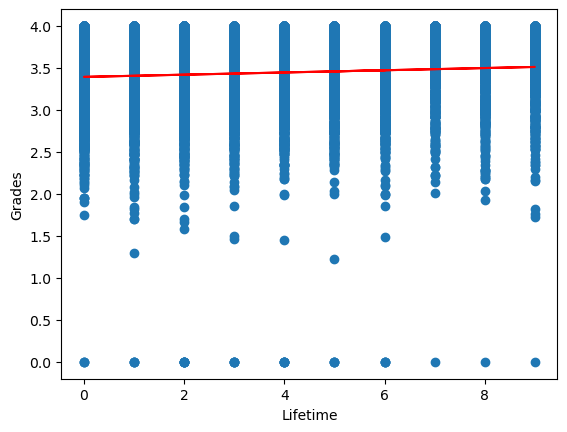

-0.0008162335023225165


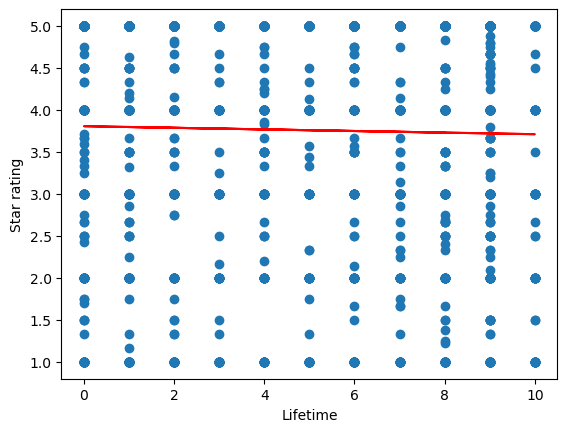

0.0004724451859804413


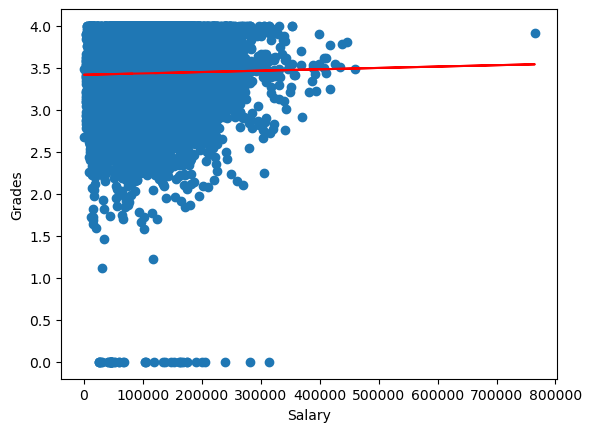

0.003539144250792603


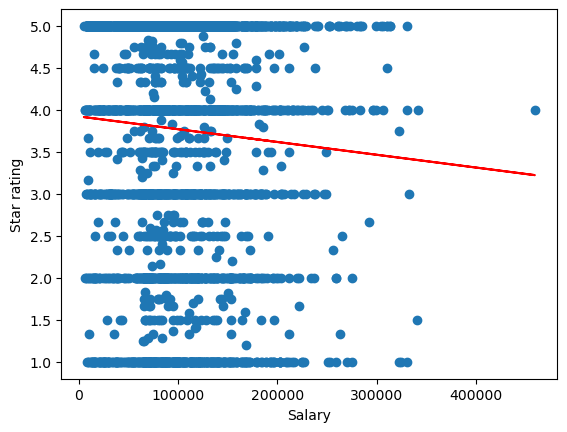

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


0.007651739866490037


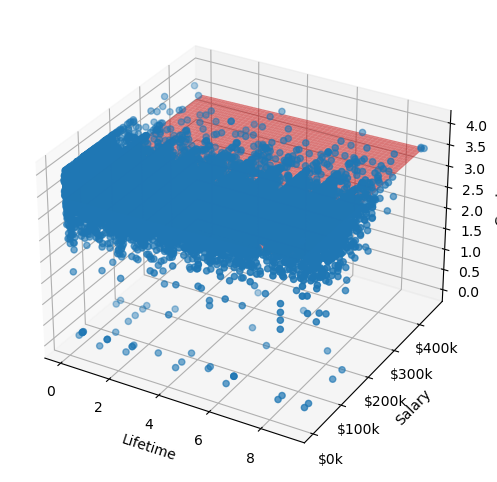

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


0.00670321669980023


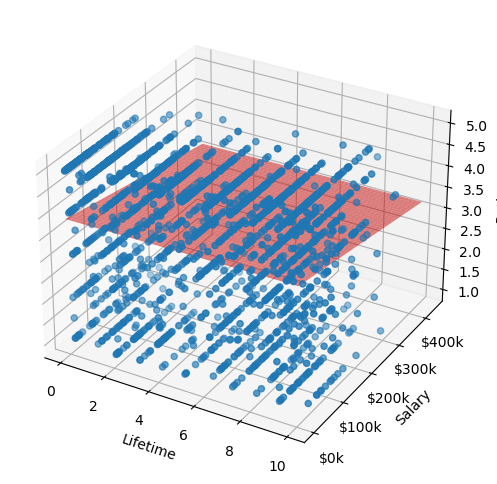

In [76]:
import sklearn.model_selection
import sklearn.linear_model
# Linear Regression Analysis

# Regression of lifetime vs grades
lifetime_train, lifetime_test, grade_train, grade_test = sklearn.model_selection.train_test_split(lifeTimeGrades['lifetime'], lifeTimeGrades['average_gpa'], test_size=0.3)
linear = sklearn.linear_model.LinearRegression().fit(np.array(lifetime_train).reshape(-1,1), grade_train)
print(linear.score(np.array(lifetime_test).reshape(-1,1), grade_test))
gradePredict = linear.predict(np.array(lifetime_test).reshape(-1,1))
plt.scatter(np.array(lifetime_test).reshape(-1,1), grade_test)
plt.plot(np.array(lifetime_test).reshape(-1,1), gradePredict, color='red')
plt.xlabel('Lifetime')
plt.ylabel('Grades')
plt.show()

# Regression of lifetime vs starRating
lifetime_train, lifetime_test, rating_train, rating_test = sklearn.model_selection.train_test_split(lifeTimeRating['lifetime'], lifeTimeRating['average_rating'], test_size=0.3)
linear = sklearn.linear_model.LinearRegression().fit(np.array(lifetime_train).reshape(-1,1), rating_train)
print(linear.score(np.array(lifetime_test).reshape(-1,1), rating_test))
ratingPredict = linear.predict(np.array(lifetime_test).reshape(-1,1))
plt.scatter(np.array(lifetime_test).reshape(-1,1), rating_test)
plt.plot(np.array(lifetime_test).reshape(-1,1), ratingPredict, color='red')
plt.xlabel('Lifetime')
plt.ylabel('Star rating')
plt.show()

# Regression of salary vs grades
salary_train, salary_test, grade_train, grade_test = sklearn.model_selection.train_test_split(salaryGrades['current_salary'], salaryGrades['average_gpa'], test_size=0.3)
linear = sklearn.linear_model.LinearRegression().fit(np.array(salary_train).reshape(-1,1), grade_train)
print(linear.score(np.array(salary_test).reshape(-1,1), grade_test))
gradePredict = linear.predict(np.array(salary_test).reshape(-1,1))
plt.scatter(np.array(salary_test).reshape(-1,1), grade_test)
plt.plot(np.array(salary_test).reshape(-1,1), gradePredict, color='red')
plt.xlabel('Salary')
plt.ylabel('Grades')
plt.show()
# Regression of salary vs starRating
salary_train, salary_test, rating_train, rating_test = sklearn.model_selection.train_test_split(salaryRating['current_salary'], salaryRating['average_rating'], test_size=0.3)
linear = sklearn.linear_model.LinearRegression().fit(np.array(salary_train).reshape(-1,1), rating_train)
print(linear.score(np.array(salary_test).reshape(-1,1), rating_test))
ratingPredict = linear.predict(np.array(salary_test).reshape(-1,1))
plt.scatter(np.array(salary_test).reshape(-1,1), rating_test)
plt.plot(np.array(salary_test).reshape(-1,1), ratingPredict, color='red')
plt.xlabel('Salary')
plt.ylabel('Star rating')
plt.show()

# 3d Regression of salary and lifetime as x variables and grades as y variable
X = lsGrades.drop('average_gpa', axis=1)
y = lsGrades['average_gpa']
ls_train, ls_test, grade_train, grade_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3)
linear = sklearn.linear_model.LinearRegression().fit(np.array(ls_train), grade_train)
print(linear.score(ls_test, grade_test))
gradePredict = linear.predict(ls_test)

fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')

ax.scatter3D(ls_test['lifetime'], ls_test['current_salary'], grade_test)
ax.set_xlabel('Lifetime')
ax.set_ylabel('Salary')
ax.set_zlabel('Grades')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'${x/1000:.0f}k'))

#Create a meshgrid for the linear regression surface plot
x = np.linspace(min(ls_test['lifetime']), max(ls_test['lifetime']), 100)
y = np.linspace(min(ls_test['current_salary']), max(ls_test['current_salary']), 100)
X, Y = np.meshgrid(x, y)

#Predict GPA values
Z = linear.predict(np.column_stack((X.ravel(), Y.ravel())))
Z = Z.reshape(X.shape)

ax.plot_surface(X, Y, Z, color='r', alpha=0.5, label='Regression Plane')
plt.show()

# 3d Regression of salary and lifetime as x variables and star rating as y variable
X = lsRating.drop('average_rating', axis=1)
y = lsRating['average_rating']
ls_train, ls_test, rating_train, rating_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3)
linear = sklearn.linear_model.LinearRegression().fit(np.array(ls_train), rating_train)
print(linear.score(ls_test, rating_test))
ratingPredict = linear.predict(ls_test)

fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')

ax.scatter3D(ls_test['lifetime'], ls_test['current_salary'], rating_test)
ax.set_xlabel('Lifetime')
ax.set_ylabel('Salary')
ax.set_zlabel('Rating')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'${x/1000:.0f}k'))

#Create a meshgrid for the linear regression surface plot
x = np.linspace(min(ls_test['lifetime']), max(ls_test['lifetime']), 100)
y = np.linspace(min(ls_test['current_salary']), max(ls_test['current_salary']), 100)
X, Y = np.meshgrid(x, y)

#Predict GPA values
Z = linear.predict(np.column_stack((X.ravel(), Y.ravel())))
Z = Z.reshape(X.shape)

ax.plot_surface(X, Y, Z, color='r', alpha=0.5, label='Regression Plane')
plt.show()

0.7559061554810758


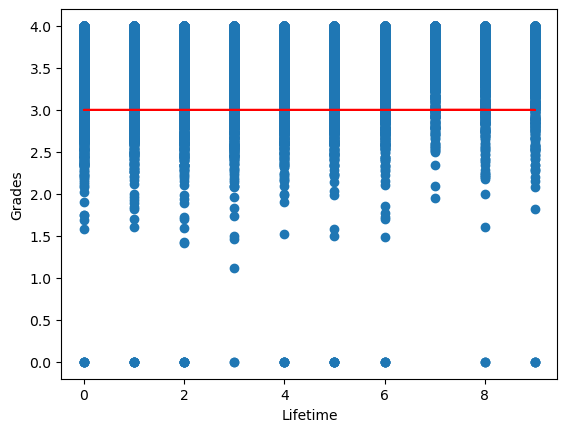

0.45734208367514356


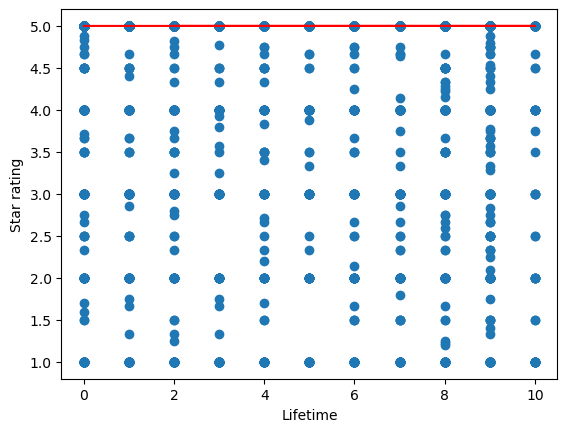

0.7551468972085867


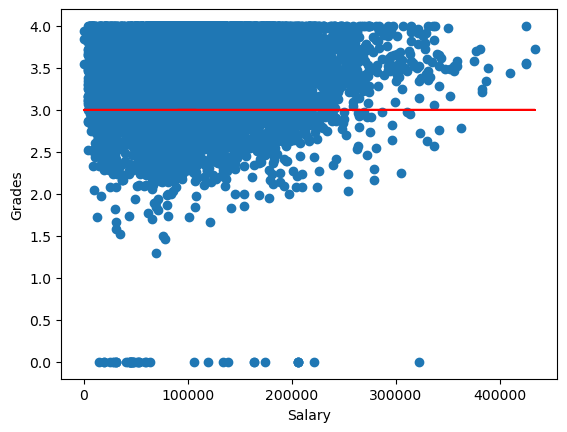

0.43830151040182386


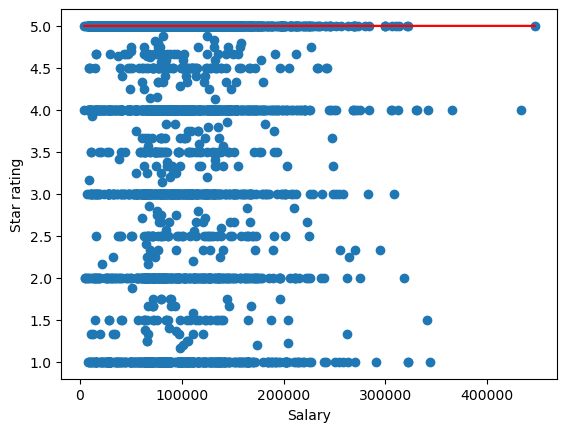

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.7576228235101774


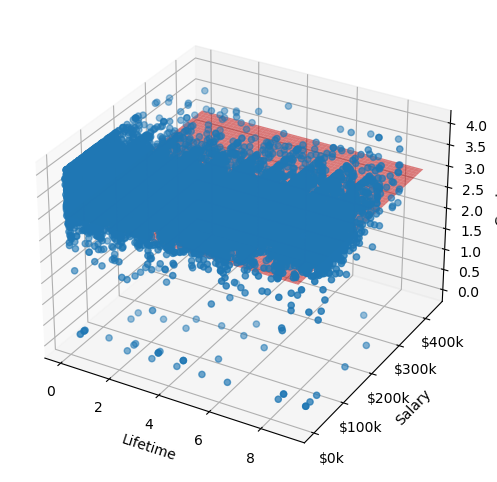

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.4602132895816243


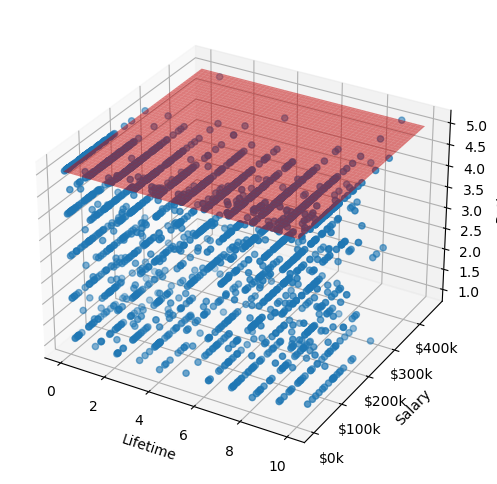

In [78]:
# The reason it shows up as a straight line is because it is the beginning / the end of the log function so it is only showing the straight line portion of the graph

#Regression of liftime vs grades
lifetime_train, lifetime_test, grade_train, grade_test = sklearn.model_selection.train_test_split(lifeTimeGrades['lifetime'], lifeTimeGrades['average_gpa'], test_size=0.3)
logistic = sklearn.linear_model.LogisticRegression().fit(np.array(lifetime_train).reshape(-1,1), grade_train.astype('int'))
print(logistic.score(np.array(lifetime_test).reshape(-1,1), grade_test.astype('int')))
gradePredict = logistic.predict(np.array(lifetime_test).reshape(-1,1))
plt.scatter(np.array(lifetime_test).reshape(-1,1), grade_test)
plt.plot(np.array(lifetime_test).reshape(-1,1), gradePredict, color='red')
plt.xlabel('Lifetime')
plt.ylabel('Grades')
plt.show()

# Regression of lifetime vs starRating
lifetime_train, lifetime_test, rating_train, rating_test = sklearn.model_selection.train_test_split(lifeTimeRating['lifetime'], lifeTimeRating['average_rating'], test_size=0.3)
logistic = sklearn.linear_model.LogisticRegression().fit(np.array(lifetime_train).reshape(-1,1), rating_train.astype('int'))
print(logistic.score(np.array(lifetime_test).reshape(-1,1), rating_test.astype('int')))
ratingPredict = logistic.predict(np.array(lifetime_test).reshape(-1,1))
plt.scatter(np.array(lifetime_test).reshape(-1,1), rating_test)
plt.plot(np.array(lifetime_test).reshape(-1,1), ratingPredict, color='red')
plt.xlabel('Lifetime')
plt.ylabel('Star rating')
plt.show()

# Regression of salary vs grades
salary_train, salary_test, grade_train, grade_test = sklearn.model_selection.train_test_split(salaryGrades['current_salary'], salaryGrades['average_gpa'], test_size=0.3)
logistic = sklearn.linear_model.LogisticRegression().fit(np.array(salary_train).reshape(-1,1), grade_train.astype('int'))
print(logistic.score(np.array(salary_test).reshape(-1,1), grade_test.astype('int')))
gradePredict = logistic.predict(np.array(salary_test).reshape(-1,1))
plt.scatter(np.array(salary_test).reshape(-1,1), grade_test)
plt.plot(np.array(salary_test).reshape(-1,1), gradePredict, color='red')
plt.xlabel('Salary')
plt.ylabel('Grades')
plt.show()

# Regression of salary vs starRating
salary_train, salary_test, rating_train, rating_test = sklearn.model_selection.train_test_split(salaryRating['current_salary'], salaryRating['average_rating'], test_size=0.3)
logistic = sklearn.linear_model.LogisticRegression().fit(np.array(salary_train).reshape(-1,1), rating_train.astype('int'))
print(logistic.score(np.array(salary_test).reshape(-1,1), rating_test.astype('int')))
ratingPredict = logistic.predict(np.array(salary_test).reshape(-1,1))
plt.scatter(np.array(salary_test).reshape(-1,1), rating_test)
plt.plot(np.array(salary_test).reshape(-1,1), ratingPredict, color='red')
plt.xlabel('Salary')
plt.ylabel('Star rating')
plt.show()

# 3d Regression of salary and lifetime as x variables and grades as y variable
X = lsGrades.drop('average_gpa', axis=1)
y = lsGrades['average_gpa']
ls_train, ls_test, grade_train, grade_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3)
logistic = sklearn.linear_model.LogisticRegression().fit(np.array(ls_train), grade_train.astype('int'))
print(logistic.score(ls_test, grade_test.astype('int')))
gradePredict = logistic.predict(ls_test)

fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')

ax.scatter3D(ls_test['lifetime'], ls_test['current_salary'], grade_test)
ax.set_xlabel('Lifetime')
ax.set_ylabel('Salary')
ax.set_zlabel('Grades')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'${x/1000:.0f}k'))

#Create a meshgrid for the logistic regression surface plot
x = np.linspace(min(ls_test['lifetime']), max(ls_test['lifetime']), 100)
y = np.linspace(min(ls_test['current_salary']), max(ls_test['current_salary']), 100)
X, Y = np.meshgrid(x, y)

#Predict GPA values
Z = logistic.predict(np.column_stack((X.ravel(), Y.ravel())))
Z = Z.reshape(X.shape)

ax.plot_surface(X, Y, Z, color='r', alpha=0.5, label='Regression Plane')
plt.show()




# 3d Regression of salary and lifetime as x variables and star rating as y variable
X = lsRating.drop('average_rating', axis=1)
y = lsRating['average_rating']
ls_train, ls_test, rating_train, rating_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3)
logistic = sklearn.linear_model.LogisticRegression().fit(np.array(ls_train), rating_train.astype('int'))
print(logistic.score(ls_test, rating_test.astype('int')))
ratingPredict = logistic.predict(ls_test)

fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')

ax.scatter3D(ls_test['lifetime'], ls_test['current_salary'], rating_test)
ax.set_xlabel('Lifetime')
ax.set_ylabel('Salary')
ax.set_zlabel('Rating')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'${x/1000:.0f}k'))

#Create a meshgrid for the logistic regression surface plot
x = np.linspace(min(ls_test['lifetime']), max(ls_test['lifetime']), 100)
y = np.linspace(min(ls_test['current_salary']), max(ls_test['current_salary']), 100)
X, Y = np.meshgrid(x, y)

#Predict GPA values
Z = logistic.predict(np.column_stack((X.ravel(), Y.ravel())))
Z = Z.reshape(X.shape)

ax.plot_surface(X, Y, Z, color='r', alpha=0.5, label='Regression Plane')
plt.show()

In [88]:
df.head()

,name,course,semester,average_rating,num_reviews,average_gpa,num_students,years_taught,salaries,departments,real_name(s),_merge,min_year,curr_year,lifetime,sem,year,current_salary
0,A SHARMA,ASTR300,fall 2019,1.0,1.0,NaN,0,"[2013, 2014, 2015, 2016, 2017, 2018, 2019, 202...","[68417.04, 146412.46, 76537.12, 76537.12, 7768...","['CMNS', 'CMNS', 'CMNS', 'CMNS', 'CMNS', 'CMNS...","Sharma, A Surjalal",both,2013,2019,6.0,fall,2019,86528.86
0,A SHARMA,ASTR300,spring 2019,1.5,2.0,2.85,57,"[2013, 2014, 2015, 2016, 2017, 2018, 2019, 202...","[68417.04, 146412.46, 76537.12, 76537.12, 7768...","['CMNS', 'CMNS', 'CMNS', 'CMNS', 'CMNS', 'CMNS...","Sharma, A Surjalal",both,2013,2019,6.0,spring,2019,86528.86
0,A SHARMA,ASTR300,fall 2020,2.0,1.0,NaN,0,"[2013, 2014, 2015, 2016, 2017, 2018, 2019, 202...","[68417.04, 146412.46, 76537.12, 76537.12, 7768...","['CMNS', 'CMNS', 'CMNS', 'CMNS', 'CMNS', 'CMNS...","Sharma, A Surjalal",both,2013,2020,7.0,fall,2020,82844.37
0,A SHARMA,ASTR300,winter 2021,3.0,1.0,NaN,0,"[2013, 2014, 2015, 2016, 2017, 2018, 2019, 202...","[68417.04, 146412.46, 76537.12, 76537.12, 7768...","['CMNS', 'CMNS', 'CMNS', 'CMNS', 'CMNS', 'CMNS...","Sharma, A Surjalal",both,2013,2021,8.0,winter,2021,82844.37
0,A SHARMA,ASTR300,fall 2016,NaN,NaN,2.92,51,"[2013, 2014, 2015, 2016, 2017, 2018, 2019, 202...","[68417.04, 146412.46, 76537.12, 76537.12, 7768...","['CMNS', 'CMNS', 'CMNS', 'CMNS', 'CMNS', 'CMNS...","Sharma, A Surjalal",both,2013,2016,3.0,fall,2016,76537.12


In [145]:
df[df['current_salary'].isna()]

,name,course,semester,average_rating,num_reviews,average_gpa,num_students,years_taught,salaries,departments,real_name(s),_merge,min_year,curr_year,lifetime,sem,year,current_salary,lifetimeSalary


In [141]:
def addCategorizedGrade(data):
    data['categorized_grade'] = ""
    for index, row in data.iterrows():
        if row['average_gpa'] > 3.7:
            data.loc[index, 'categorized_grade'] = "A"
        elif row['average_gpa'] > 3.3:
            data.loc[index, 'categorized_grade'] = "A-"
        elif row['average_gpa'] > 3.0:
            data.loc[index, 'categorized_grade'] = "B+"
        elif row['average_gpa'] > 2.7:
            data.loc[index, 'categorized_grade'] = "B"
        elif row['average_gpa'] > 2.3:
            data.loc[index, 'categorized_grade'] = "B-"
        elif row['average_gpa'] > 2.0:
            data.loc[index, 'categorized_grade'] = "C+"
        elif row['average_gpa'] > 1.7:
            data.loc[index, 'categorized_grade'] = "C"
        elif row['average_gpa'] > 1.3:
            data.loc[index, 'categorized_grade'] = "C-"
        elif row['average_gpa'] > 1.0:
            data.loc[index, 'categorized_grade'] = "D+"
        elif row['average_gpa'] > 0.7:
            data.loc[index, 'categorized_grade'] = "D"
        else:
            data.loc[index, 'categorized_grade'] = "F"

In [155]:
# Creating categorized values for SVM

df_svm = df.copy()
df_svm = df_svm[df_svm['average_gpa'].notna() & df_svm['lifetime'].notna()]

teacherLifetimeGrades = df[(df['lifetime'].notna()) & (df['average_gpa'].notna())]
teacherLifetimeRating = df[(df['lifetime'].notna()) & (df['average_rating'].notna())]
salaryGrades = df[(df['current_salary'].notna()) & (df['average_gpa'].notna())]
salaryRating = df[(df['current_salary'].notna()) & (df['average_rating'].notna())]
lsGrades = df[(df['lifetime'].notna()) & (df['current_salary'].notna()) & (df['average_gpa'].notna())]
lsRating = df[(df['lifetime'].notna()) & (df['current_salary'].notna()) & (df['average_rating'].notna())]

addCategorizedGrade(teacherLifetimeGrades)
addCategorizedGrade(salaryGrades)
addCategorizedGrade(lsGrades)

teacherLifetimeGrades = teacherLifetimeGrades[['lifetime', 'categorized_grade']]
teacherLifetimeRating = teacherLifetimeRating[['lifetime', 'average_rating']]
salaryGrades = salaryGrades[['current_salary', 'categorized_grade']]
salaryRating = salaryRating[['current_salary', 'average_rating']]
lsGrades = lsGrades[['lifetime', 'current_salary', 'categorized_grade']]
lsRating = lsRating[['lifetime', 'current_salary', 'average_rating']]

#categorize rating data
teacherLifetimeRating['average_rating'] = teacherLifetimeRating['average_rating'].astype(int) 
salaryRating['average_rating'] = salaryRating['average_rating'].astype(int) 
lsRating['average_rating'] = lsRating['average_rating'].astype(int) 

#teacherLifetime = df_svm['lifetime']
#teacherSalaries = df_svm['current_salary']

# grades = df_svm['average_gpa']
# starRating = df_svm['average_rating']
# nlpRating = []
# df_svm['lifetimeSalary'] = [list(elt) for elt in zip(teacherLifetime, teacherSalaries)]
# categorizedGrade = []
#grades.dropna(inplace=True)



# lifeTimeGrades = df_svm[['lifetime', 'average_gpa']]
# #lifeTimeGrades.dropna(inplace=True)
# lifeTimeRating = df_svm[['lifetime', 'average_rating']]
# #lifeTimeRating.dropna(inplace=True)
# salaryGrades = df_svm[['current_salary', 'average_gpa']]
# #salaryGrades.dropna(inplace=True)
# salaryRating = df_svm[['current_salary', 'average_rating']]
# #salaryRating.dropna(inplace=True)
# lsGrades = df_svm[['lifetime', 'current_salary', 'average_gpa']]
# #lsGrades.dropna(inplace=True)
# lsRating = df_svm[['lifetime', 'current_salary', 'average_rating']]
# #lsRating.dropna(inplace=True)

# starRating.dropna(inplace=True)
# categorizedRating = [int(rating) for rating in starRating]


/tmp/ipykernel_9556/2160808469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['categorized_grade'] = ""
/tmp/ipykernel_9556/2160808469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['categorized_grade'] = ""
/tmp/ipykernel_9556/2160808469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [163]:
# SVM Analysis

# SVM of lifetime and grades
lifetime_train, lifetime_test, grade_train, grade_test = sklearn.model_selection.train_test_split(teacherLifetimeGrades['lifetime'], teacherLifetimeGrades['categorized_grade'], test_size=0.3)
svm = sklearn.svm.SVC().fit(np.array(lifetime_train).reshape(-1,1), grade_train)
print(svm.score(np.array(lifetime_test).reshape(-1,1), grade_test))
gradePredict = svm.predict(np.array(lifetime_test).reshape(-1,1))

# SVM of lifetime and ratings
lifetime_train, lifetime_test, rating_train, rating_test = sklearn.model_selection.train_test_split(teacherLifetimeRating['lifetime'], teacherLifetimeRating['average_rating'], test_size=0.3)
svm = sklearn.svm.SVC().fit(np.array(lifetime_train).reshape(-1,1), rating_train)
print(svm.score(np.array(lifetime_test).reshape(-1,1), rating_test))
ratingPredict = svm.predict(np.array(lifetime_test).reshape(-1,1))

# SVM of salary and grades
salary_train, salary_test, grade_train, grade_test = sklearn.model_selection.train_test_split(salaryGrades['current_salary'], salaryGrades['categorized_grade'], test_size=0.3)
svm = sklearn.svm.SVC().fit(np.array(salary_train).reshape(-1,1), grade_train)
print(svm.score(np.array(salary_test).reshape(-1,1), grade_test))
gradePredict = svm.predict(np.array(salary_test).reshape(-1,1))

# SVM of salary and ratings
salary_train, salary_test, rating_train, rating_test = sklearn.model_selection.train_test_split(salaryRating['current_salary'], salaryRating['average_rating'], test_size=0.3)
svm = sklearn.svm.SVC().fit(np.array(salary_train).reshape(-1,1), rating_train)
print(svm.score(np.array(salary_test).reshape(-1,1), rating_test))
ratingPredict = svm.predict(np.array(salary_test).reshape(-1,1))

# SVM of lifetime and salary vs grades
ls_train, ls_test, grade_train, grade_test = sklearn.model_selection.train_test_split(lsGrades[['lifetime', 'current_salary']], lsGrades['categorized_grade'], test_size=0.3)
svm = sklearn.svm.SVC().fit(np.array(ls_train), grade_train)
print(svm.score(np.array(ls_test), grade_test))
gradePredict = svm.predict(np.array(ls_test))

# SVM of lifetime and salary vs rating
ls_train, ls_test, rating_train, rating_test = sklearn.model_selection.train_test_split(lsRating[['lifetime', 'current_salary']], lsRating['average_rating'], test_size=0.3)
svm = sklearn.svm.SVC().fit(np.array(ls_train), rating_train)
print(svm.score(np.array(ls_test), rating_test))
ratingPredict = svm.predict(np.array(ls_test))

0.5450829722880732
0.4499589827727646
0.5412850758297311
0.4354516956397834
0.5539932968200768
0.44544708777686626


In [ ]:
# KNN Analysis

# KNN of lfetime and grade
lifetime_train, lifetime_test, grade_train, grade_test = sklearn.model_selection.train_test_split(teacherLifetime, categorizedGrade, test_size=0.3)
knn = sklearn.neighbors.KNeighborsRegressor(n_neighbors=5).fit(teacherLifetime, categorizedGrade)
knn.score(lifetime_test, grade_test)
gradePredict = knn.predict(lifetime_test)

# KNN of lifetime and rating
lifetime_train, lifetime_test, rating_train, rating_test = sklearn.model_selection.train_test_split(teacherLifetime, categorizedRating, test_size=0.3)
knn = sklearn.neighbors.KNeighborsRegressor(n_neighbors=5).fit(teacherLifetime, categorizedRating)
knn.score(lifetime_test, rating_test)
ratingPredict = knn.predict(lifetime_test)

# KNN of salary and grade
salary_train, salary_test, grade_train, grade_test = sklearn.model_selection.train_test_split(teacherSalaries, categorizedGrade, test_size=0.3)
knn = sklearn.neighbors.KNeighborsRegressor(n_neighbors=5).fit(teacherSalaries, categorizedGrade)
knn.score(salary_test, grade_test)
gradePredict = knn.predict(salary_test)

# KNN of salary and rating
salary_train, salary_test, rating_train, rating_test = sklearn.model_selection.train_test_split(teacherSalaries, categorizedRating, test_size=0.3)
knn = sklearn.neighbors.KNeighborsRegressor(n_neighbors=5).fit(teacherSalaries, categorizedRating)
knn.score(salary_test, rating_test)
ratingPredict = knn.predict(salary_test)

# KNN of lifetime and salary vs grade
ls_train, ls_test, grade_train, grade_test = sklearn.model_selection.train_test_split(lifetimeSalary, categorizedGrade, test_size=0.3)
knn = sklearn.neighbors.KNeighborsRegressor(n_neighbors=5).fit(lifetimeSalary, categorizedGrade)
knn.score(ls_test, grade_test)
gradePredict = knn.predict(ls_test)

# KNN of lifetime and salary vs rating
ls_train, ls_test, rating_train, rating_test = sklearn.model_selection.train_test_split(lifetimeSalary, categorizedRating, test_size=0.3)
knn = sklearn.neighbors.KNeighborsRegressor(n_neighbors=5).fit(lifetimeSalary, categorizedRating)
knn.score(ls_test, rating_test)
ratingPredict = knn.predict(ls_test)